In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/logged_data.csv')

Selecting potentially relevant features for creating a more accurate synthetic energy consumption


In [3]:
selected_features = [
    'Temperature', 'Signal Strength', 'Bandwidth', 'Antenna Type', 
    'Device Type', 'Power Source', 'Frequency', 'Memory Usage', 
    'WiFi Strength', 'Disk Usage', 'System Load'
]

Generate synthetic energy consumption based on the selected features and random noise


In [4]:
np.random.seed(42)
data['Energy Consumption'] = (
    10 + 
    0.5 * data['Temperature'] - 
    0.02 * data['Signal Strength'] + 
    0.0001 * data['Bandwidth'] + 
    0.00001 * data['Frequency'] + 
    0.05 * data['Memory Usage'] -
    0.01 * data['WiFi Strength'] + 
    0.1 * data['Disk Usage'] + 
    0.05 * data['System Load'] + 
    np.random.normal(0, 5, len(data))
)

Splitting data into features and target


In [5]:
X_selected = data[selected_features]
y_selected = data['Energy Consumption']

Identifying categorical and numerical columns for the selected features


In [6]:
categorical_features_selected = ['Antenna Type', 'Device Type', 'Power Source']
numerical_features_selected = list(set(selected_features) - set(categorical_features_selected))

Creating transformers

In [10]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Applying column transformations for the selected features

In [11]:
preprocessor_selected = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features_selected),
        ('cat', categorical_transformer, categorical_features_selected)
    ])

Splitting data into training and testing sets for the selected features


In [12]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

Transforming the data using the selected features

In [13]:
X_train_transformed_selected = preprocessor_selected.fit_transform(X_train_selected)
X_test_transformed_selected = preprocessor_selected.transform(X_test_selected)

Training the linear regression model on the data with selected features


In [14]:
model_selected = LinearRegression()
model_selected.fit(X_train_transformed_selected, y_train)

LinearRegression()

Predicting on the test set using the model with selected features

In [15]:
y_pred_selected = model_selected.predict(X_test_transformed_selected)

Calculating the root mean squared error (RMSE) on the test set for the model with selected features


In [16]:
rmse_selected = np.sqrt(mean_squared_error(y_test, y_pred_selected))
rmse_selected

5.013902838310065

Interpret the model

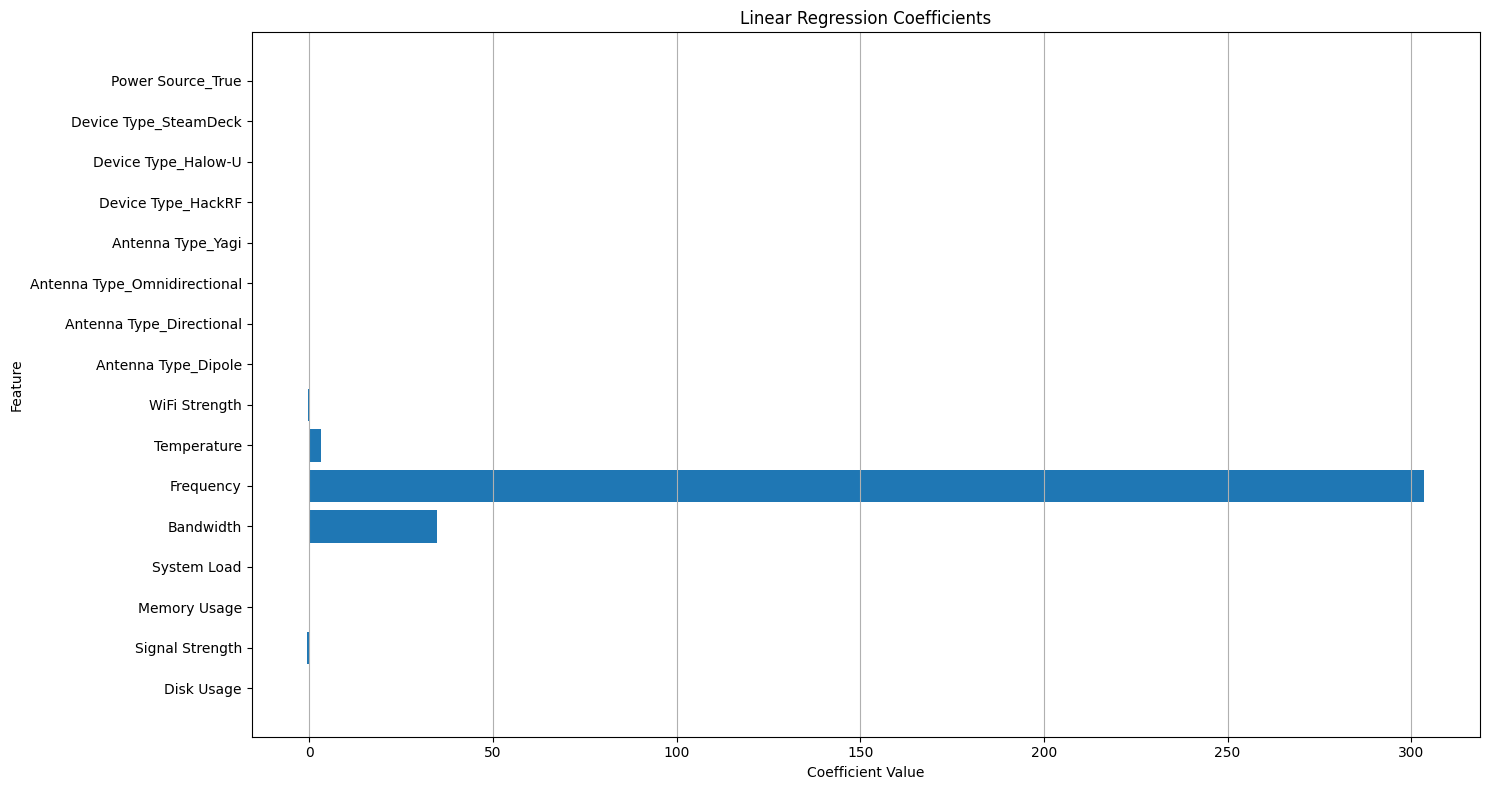

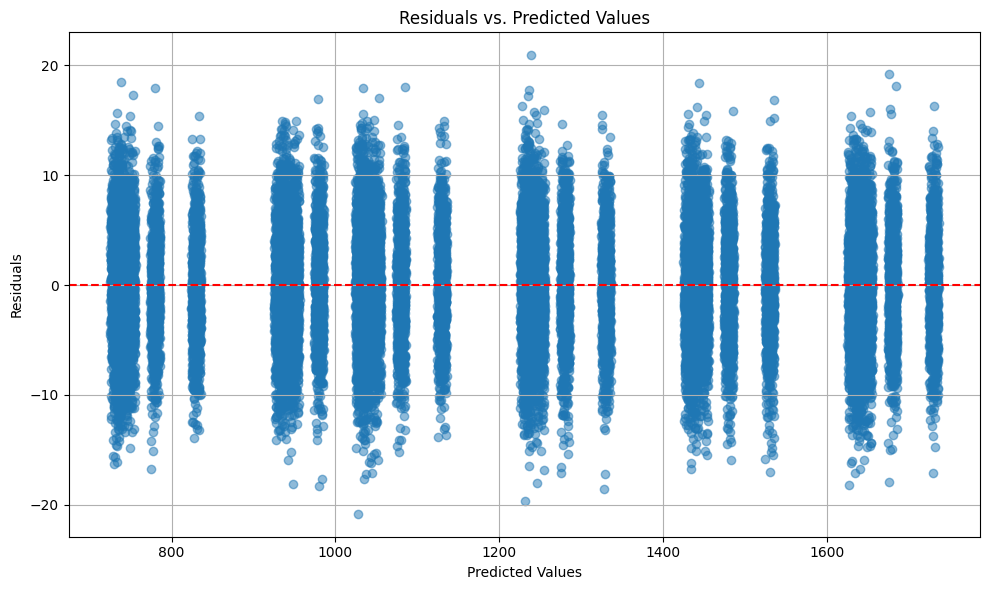

In [17]:
# Get feature names after one-hot encoding
feature_names = (numerical_features_selected + 
                 list(preprocessor_selected.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features_selected)))

# Get coefficients from the trained model
coefficients = model_selected.coef_

# Plotting the coefficients
plt.figure(figsize=(15, 8))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Calculate residuals
residuals = y_test - y_pred_selected

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_selected, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()